# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
y.isna().sum()

MEDV    0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

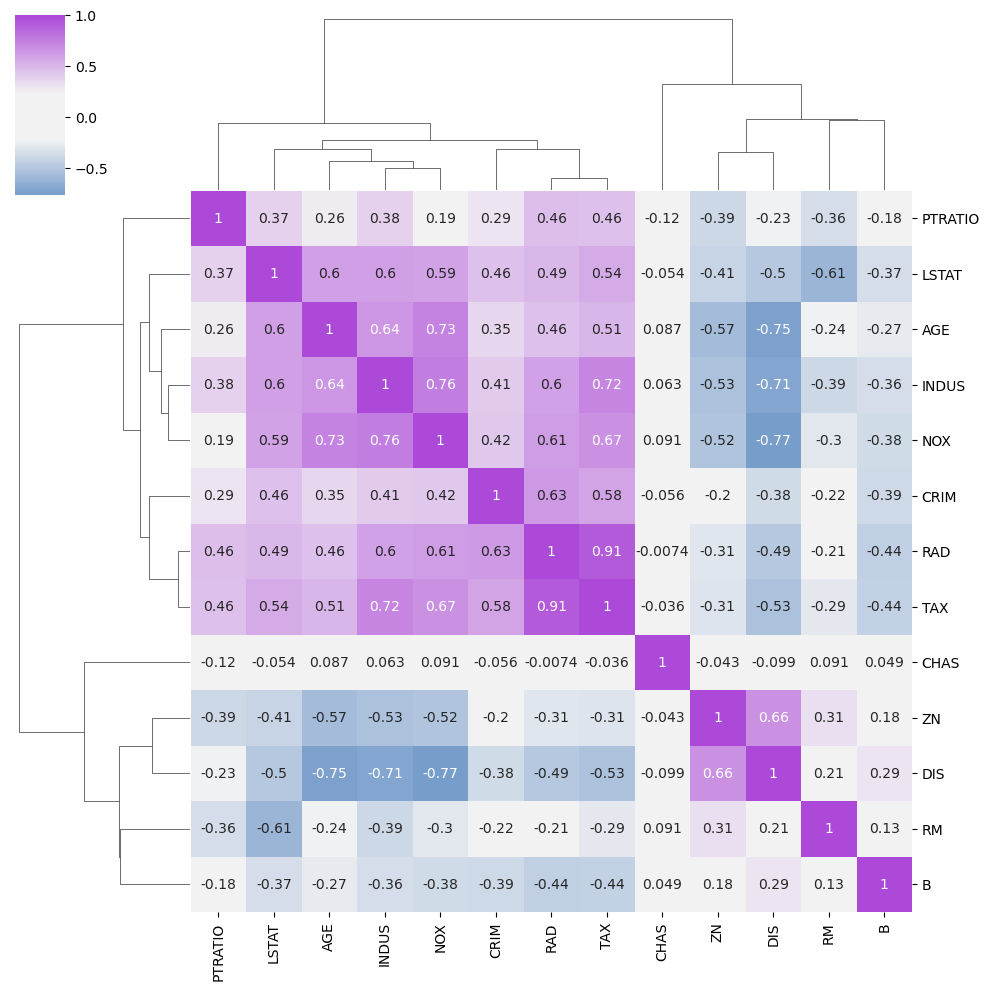

In [8]:
cmap = sns.diverging_palette(h_neg=250, h_pos=650, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X.corr(), figsize=(10, 10), annot = True, center = 0, cmap=cmap)

In [9]:
# Supondo que 'X' é o seu DataFrame
correlation_matrix = X.corr()

# Identificar as correlações positivas acima de 0.63
positive_correlations = correlation_matrix[
    (correlation_matrix > 0.63) & (correlation_matrix < 1)
].stack().sort_values(ascending=False).drop_duplicates()

# Identificar as correlações negativas abaixo de -0.63
negative_correlations = correlation_matrix[
    (correlation_matrix < -0.63) & (correlation_matrix > -1)
].stack().sort_values(ascending=True).drop_duplicates()

# Exibir as variáveis com maior correlação positiva
print("\nVariáveis com potencial preditivo com base em suas correlações positivas:\n")
print(positive_correlations)

# Exibir as variáveis com maior correlação negativa
print("\nVariáveis com potencial preditivo com base em suas correlações negativas:\n")
print(negative_correlations)


Variáveis com potencial preditivo com base em suas correlações positivas:

RAD    TAX    0.910228
INDUS  NOX    0.763651
NOX    AGE    0.731470
INDUS  TAX    0.720760
NOX    TAX    0.668023
ZN     DIS    0.664408
INDUS  AGE    0.644779
dtype: float64

Variáveis com potencial preditivo com base em suas correlações negativas:

NOX    DIS   -0.769230
AGE    DIS   -0.747881
INDUS  DIS   -0.708027
dtype: float64


### 3. Separe os dados em validação e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
tree_8 = DecisionTreeRegressor(max_depth = 8)
tree_2 = DecisionTreeRegressor(max_depth = 2)

tree_8.fit(X_train, y_train)
tree_2.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [12]:
y_pred_test_2 = tree_2.predict(X_test)
y_pred_train_2 = tree_2.predict(X_train)

y_pred_test_8 = tree_8.predict(X_test)
y_pred_train_8 = tree_8.predict(X_train)


print('Para base de treinamento:')
mse2_value = mean_squared_error(y_train, y_pred_train_2)
print('Modelo com profundidade = 2, MSE = {:.2f}'.format(mse2_value))
mse8_value = mean_squared_error(y_train, y_pred_train_8)
print('Modelo com profundidade = 8, MSE = {:.2f}'.format(mse8_value))

print('\nPara base de teste:')
mse2t_value = mean_squared_error(y_test, y_pred_test_2)
print('Modelo com profundidade = 2, MSE = {:.2f}'.format(mse2t_value))
mse8t_value = mean_squared_error(y_test, y_pred_test_8)
print('Modelo com profundidade = 8, MSE = {:.2f}'.format(mse8t_value))

Para base de treinamento:
Modelo com profundidade = 2, MSE = 25.65
Modelo com profundidade = 8, MSE = 1.95

Para base de teste:
Modelo com profundidade = 2, MSE = 25.99
Modelo com profundidade = 8, MSE = 20.31


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Analisando os valores de MSE:

* Para o modelo com profundidade 2, observamos um MSE mais alto tanto no conjunto de treinamento quanto no conjunto de teste. Isso pode indicar que o modelo é relativamente simples e está sofrendo de subajuste (underfitting).

* Para o modelo com profundidade 8, temos um MSE muito baixo no conjunto de treinamento (1.95), mas um MSE mais alto no conjunto de teste (21.41) em comparação ao conjunto de treinamento. Isso pode ser um sinal de sobreajuste (overfitting), onde o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza tão bem para novos dados.

Assim, para escolher o modelo mais adequado, devemos levar em conta o contexto específico do problema e das características dos dados. Considerando que modelo mais simples (profundidade 2) pode não se ajustar bem o suficiente aos dados, enquanto um modelo mais complexo (profundidade 8) pode estar sofrendo de sobreajuste, porém esta pode ser submetida a técnicas de pré-poda e pós-poda. Dessa forma a árvore aparentemente mais adequada é árvore com **profundiddade 8**

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

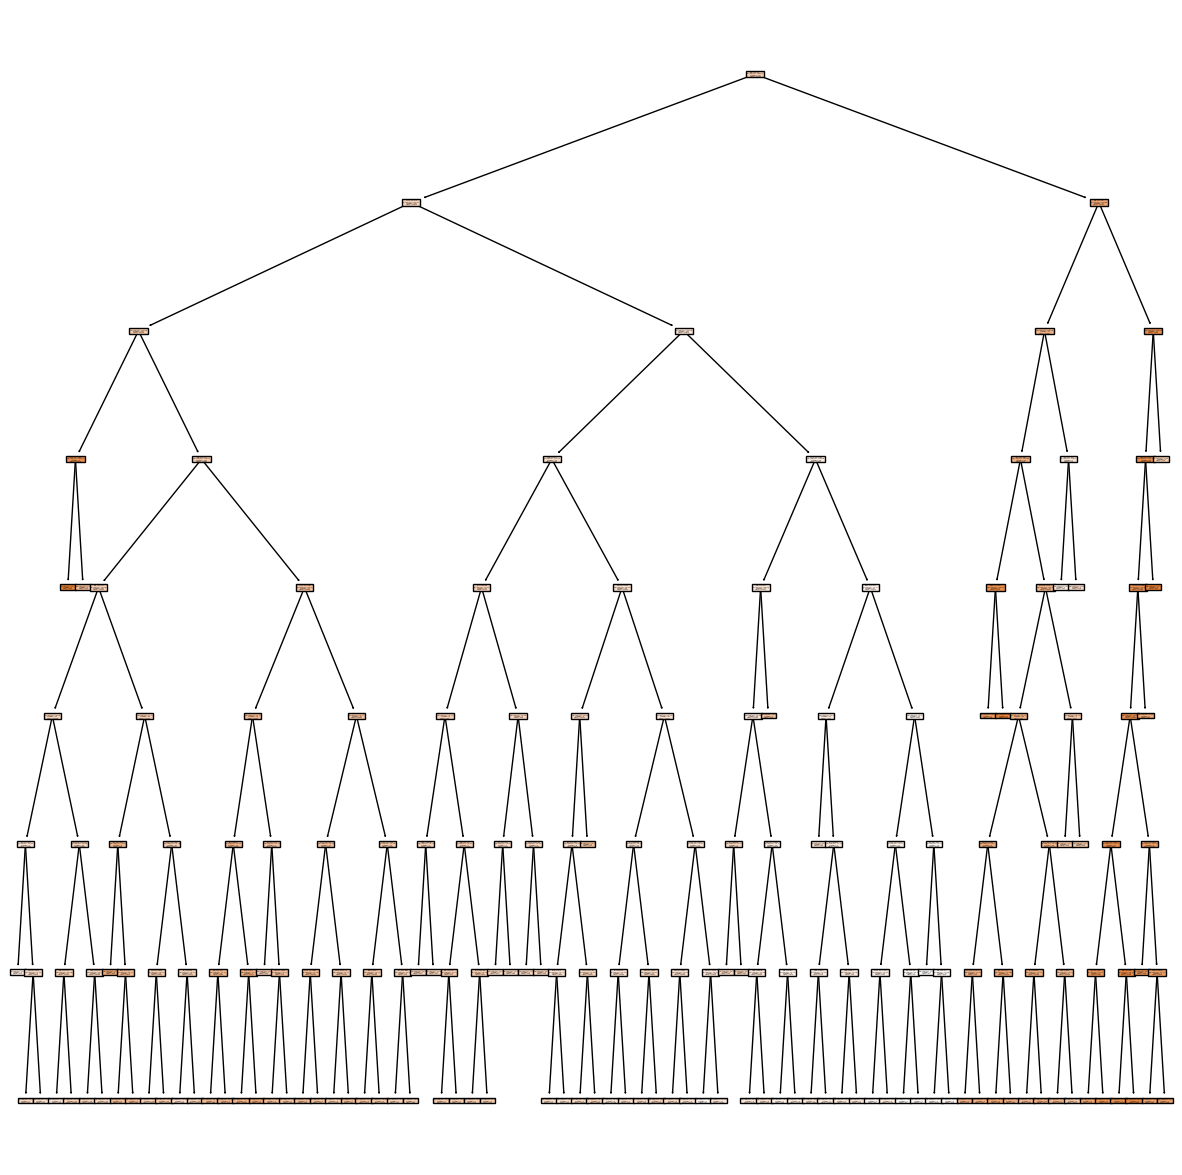

In [13]:
plt.rc('figure', figsize = (15, 15))

tp = tree.plot_tree(tree_8,
                    feature_names = X.columns,
                    filled = True)

Para variável mais importante podemos aplicar o atributo 'feature_importances_' que é própria da scikit-learn.

In [14]:
variavel_importante = tree_8.feature_importances_

variavel_importante_df = pd.DataFrame({'Variável': X.columns, 'Percentual_de_Importancia': variavel_importante})

variavel_importante_df = pd.DataFrame({
    'Variável': X.columns,
    'Percentual_de_Importancia': variavel_importante
}).sort_values(by='Percentual_de_Importancia', ascending=False).reset_index(drop=True).rename_axis('Ordem')


variavel_importante_df

,Variável,Percentual_de_Importancia
Ordem,,
0,RM,0.601042
1,LSTAT,0.223270
2,DIS,0.068873
3,CRIM,0.056125
4,AGE,0.011036
5,PTRATIO,0.009354
6,TAX,0.009013
7,B,0.007240
8,NOX,0.006395


In [ ]:
Pelo que se vê acima a varíavel mais importante é RM.